In [ ]:
#pip install pyttsx3

In [ ]:
import re
import pandas as pd
#import pyttsx3
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import warnings

In [ ]:
# Baca dataset training dan testing
training = pd.read_csv('Training.csv')
testing = pd.read_csv('Testing.csv')

# Tampilkan lima baris pertama dari dataset training
print("Dataset Training:")
print(training.head())

Dataset Training:
   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0     

In [ ]:
# Tampilkan lima baris pertama dari dataset testing
print("\nDataset Testing:")
print(testing.head())


Dataset Testing:
   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0     

In [ ]:
# Definisikan kolom-kolom fitur dan target
cols = training.columns[:-1]
x = training[cols]
y = training['prognosis']
reduced_data = training.groupby(training['prognosis']).max()

# Mapping strings to numbers
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

# Bagi dataset menjadi training dan testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
# Bagi dataset testing menjadi fitur dan target
testx = testing[cols]
testy = testing['prognosis']
testy = le.transform(testy)

# Latih model DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Evaluasi model DecisionTreeClassifier
dt_accuracy = clf.score(x_test, y_test)
dt_cross_val_score = cross_val_score(clf, x_test, y_test, cv=3).mean()
dt_y_pred = clf.predict(x_test)
dt_classification_report = classification_report(y_test, dt_y_pred)
dt_confusion_matrix = confusion_matrix(y_test, dt_y_pred)

dt_precision = precision_score(y_test, dt_y_pred, average='weighted')
dt_recall = recall_score(y_test, dt_y_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_y_pred, average='weighted')

In [ ]:
# Latih model SVC
model = SVC()
model.fit(x_train, y_train)

SVC()

In [ ]:
# Evaluasi model SVC
svc_accuracy = model.score(x_test, y_test)
svc_y_pred = model.predict(x_test)
svc_classification_report = classification_report(y_test, svc_y_pred)
svc_confusion_matrix = confusion_matrix(y_test, svc_y_pred)

svc_precision = precision_score(y_test, svc_y_pred, average='weighted')
svc_recall = recall_score(y_test, svc_y_pred, average='weighted')
svc_f1 = f1_score(y_test, svc_y_pred, average='weighted')

In [ ]:
# Fungsi untuk menampilkan confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()


DecisionTreeClassifier:
Accuracy: 1.0
Cross Validation Score: 0.9759874770651589
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        42
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        42
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00        37
           8       1.00      1.00      1.00        38
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        34
          11       1.00      1.00      1.00        46
          12       1.00      1.00      1.00        35
          13       1.00      1.00      1.00        50
          14       1.00      1.00      1.0

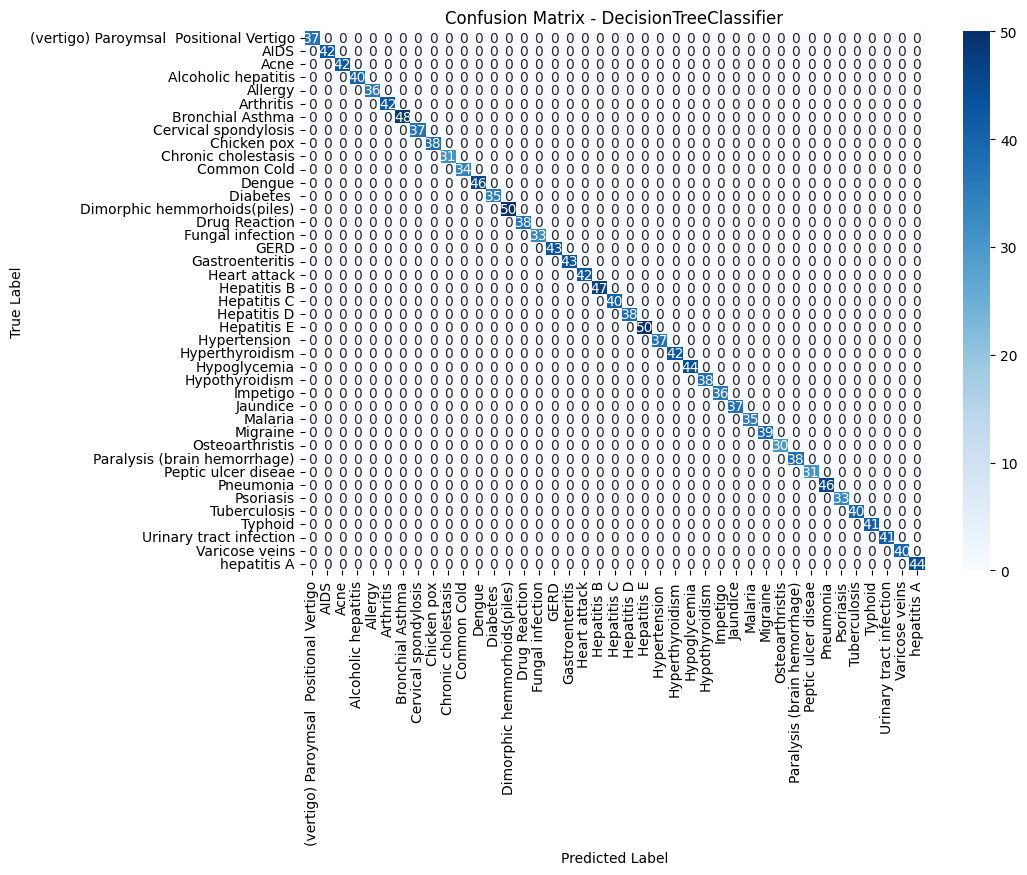

In [ ]:
# Tampilkan hasil evaluasi
print("\nDecisionTreeClassifier:")
print("Accuracy:", dt_accuracy)
print("Cross Validation Score:", dt_cross_val_score)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)
print("Classification Report:\n", dt_classification_report)
print("Confusion Matrix:\n", dt_confusion_matrix)
plot_confusion_matrix(dt_confusion_matrix, classes=le.classes_, title='Confusion Matrix - DecisionTreeClassifier')




SVC:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        42
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        42
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00        37
           8       1.00      1.00      1.00        38
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        34
          11       1.00      1.00      1.00        46
          12       1.00      1.00      1.00        35
          13       1.00      1.00      1.00        50
          14       1.00      1.00      1.00        38
          15       1.00      1.00      1.00       

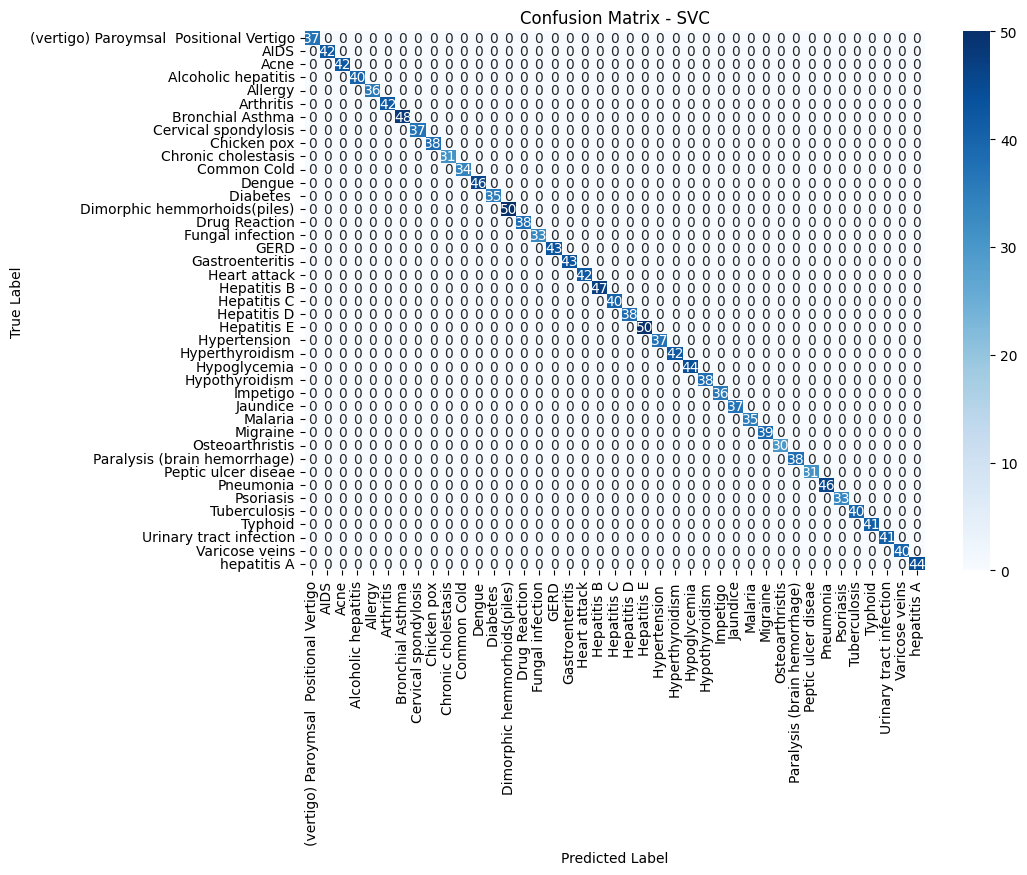

In [ ]:
print("\nSVC:")
print("Accuracy:", svc_accuracy)
print("Precision:", svc_precision)
print("Recall:", svc_recall)
print("F1 Score:", svc_f1)
print("Classification Report:\n", svc_classification_report)
print("Confusion Matrix:\n", svc_confusion_matrix)
plot_confusion_matrix(svc_confusion_matrix, classes=le.classes_, title='Confusion Matrix - SVC')

# **Decision Tree**

Decision Tree membagi data berdasarkan fitur dan nilai ambang untuk membuat pohon keputusan di mana setiap cabang mewakili keputusan berdasarkan fitur tertentu dan setiap daun mewakili label kelas.

***Kelebihan:***

Mudah untuk dimengerti dan diinterpretasikan.
Dapat menangani data numerik dan kategori tanpa memerlukan pra-pemrosesan yang banyak.
Cepat dalam membuat prediksi setelah model dilatih.
Dapat menangani masalah multi-kelas secara alami.

***Kekurangan:***

Rentan terhadap overfitting, terutama jika pohonnya sangat dalam.
Performa mungkin tidak sebaik algoritma yang lebih kompleks pada data yang sangat bervariasi.
Keputusan bisa sangat bervariasi dengan perubahan kecil pada data (tidak stabil).

#**Support Vector Classifier (SVC)**

SVC menggunakan konsep hyperplane untuk memisahkan data dalam ruang fitur. Ini mencoba menemukan hyperplane yang memaksimalkan margin antara kelas yang berbeda.

***Kelebihan:***

Baik untuk data dengan dimensi tinggi (banyak fitur).
Efektif dalam kasus di mana ada margin pemisah yang jelas antara kelas.
Relatif tahan terhadap overfitting, terutama dengan kernel yang sesuai dan pengaturan parameter regularisasi yang baik.
Dapat bekerja dengan kernel trik untuk menangani data non-linear.

***Kekurangan:***

Kurang intuitif dan sulit diinterpretasikan dibandingkan dengan Decision Tree.
Memerlukan pemilihan kernel dan parameter yang hati-hati.
Lebih lambat untuk prediksi pada dataset besar karena kompleksitas komputasi.
Tidak bekerja dengan baik pada dataset besar yang berisi banyak noise dan overlapping class.

In [ ]:
# Contoh input dan output
example_input = x_test.iloc[0]
example_prediction_dt = clf.predict([example_input])
example_prediction_svc = model.predict([example_input])
example_actual = y_test[0]

print("\nContoh Input:")
print(example_input)
print("\nPrediksi DecisionTreeClassifier:", le.inverse_transform(example_prediction_dt))
print("Prediksi SVC:", le.inverse_transform(example_prediction_svc))
print("Label Sebenarnya:", le.inverse_transform([example_actual]))


Contoh Input:
itching                 0
skin_rash               1
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
small_dents_in_nails    0
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
Name: 373, Length: 132, dtype: int64

Prediksi DecisionTreeClassifier: ['Acne']
Prediksi SVC: ['Acne']
Label Sebenarnya: ['Acne']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
# #def readn(nstr):
#     engine = pyttsx3.init()

#     #engine.setProperty('voice', "english+f5")
#     #engine.setProperty('rate', 130)

#     engine.say(nstr)
#     engine.runAndWait()
#     engine.stop()

severityDictionary=dict()
description_list = dict()
precautionDictionary=dict()

symptoms_dict = {}

In [ ]:
for index, symptom in enumerate(x):
       symptoms_dict[symptom] = index
def calc_condition(exp,days):
    sum=0
    for item in exp:
         sum=sum+severityDictionary[item]
    if((sum*days)/(len(exp)+1)>13):
        print("You should take the consultation from doctor. ")
    else:
        print("It might not be that bad but you should take precautions.")


def getDescription():
    global description_list
    with open('symptom_Description.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _description={row[0]:row[1]}
            description_list.update(_description)

def getSeverityDict():
    global severityDictionary
    with open('Symptom_severity.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        try:
            for row in csv_reader:
                _diction={row[0]:int(row[1])}
                severityDictionary.update(_diction)
        except:
            pass


def getprecautionDict():
    global precautionDictionary
    with open('symptom_precaution.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _prec={row[0]:[row[1],row[2],row[3],row[4]]}
            precautionDictionary.update(_prec)


def getInfo():
    print("-----------------------------------HealthCare ChatBot-----------------------------------")
    print("\nYour Name? \t\t\t\t",end="->")
    name=input("")
    print("Hello, ",name)

def check_pattern(dis_list,inp):
    pred_list=[]
    inp=inp.replace(' ','_')
    patt = f"{inp}"
    regexp = re.compile(patt)
    pred_list=[item for item in dis_list if regexp.search(item)]
    if(len(pred_list)>0):
        return 1,pred_list
    else:
        return 0,[]
def sec_predict(symptoms_exp):
    df = pd.read_csv('Training.csv')
    X = df.iloc[:, :-1]
    y = df['prognosis']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
    rf_clf = DecisionTreeClassifier()
    rf_clf.fit(X_train, y_train)

    symptoms_dict = {symptom: index for index, symptom in enumerate(X)}
    input_vector = np.zeros(len(symptoms_dict))
    for item in symptoms_exp:
      input_vector[[symptoms_dict[item]]] = 1

    return rf_clf.predict([input_vector])


def print_disease(node):
    node = node[0]
    val  = node.nonzero()
    disease = le.inverse_transform(val[0])
    return list(map(lambda x:x.strip(),list(disease)))

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    chk_dis=",".join(feature_names).split(",")
    symptoms_present = []

    while True:

        print("\nEnter the symptom you are experiencing  \t\t",end="->")
        print("\n--------------------------------------------")
        disease_input = input("")
        conf,cnf_dis=check_pattern(chk_dis,disease_input)
        if conf==1:
            print("searches related to input: ")
            print("\n--------------------------------------------")
            for num,it in enumerate(cnf_dis):
                print(num,")",it)
            if num!=0:
                print(f"Select the one you meant (0 - {num}):  ", end="")
                conf_inp = int(input(""))
            else:
                conf_inp=0

            disease_input=cnf_dis[conf_inp]
            break
            # print("Did you mean: ",cnf_dis,"?(yes/no) :",end="")
            # conf_inp = input("")
            # if(conf_inp=="yes"):
            #     break
        else:
            print("Enter valid symptom.")

    while True:
        try:
            num_days=int(input("Okay. From how many days ? : "))
            break
        except:
            print("Enter valid input.")
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]

            if name == disease_input:
                val = 1
            else:
                val = 0
            if  val <= threshold:
                recurse(tree_.children_left[node], depth + 1)
            else:
                symptoms_present.append(name)
                recurse(tree_.children_right[node], depth + 1)
        else:
            present_disease = print_disease(tree_.value[node])
            # print( "You may have " +  present_disease )
            red_cols = reduced_data.columns
            symptoms_given = red_cols[reduced_data.loc[present_disease].values[0].nonzero()]
            # dis_list=list(symptoms_present)
            # if len(dis_list)!=0:
            #     print("symptoms present  " + str(list(symptoms_present)))
            # print("symptoms given "  +  str(list(symptoms_given)) )
            print("Are you experiencing any ")
            symptoms_exp=[]
            for syms in list(symptoms_given):
                inp=""
                print(syms,"? : ",end='')
                while True:
                    inp=input("")
                    if(inp=="yes" or inp=="no"):
                        break
                    else:
                        print("provide proper answers i.e. (yes/no) : ",end="")
                if(inp=="yes"):
                    symptoms_exp.append(syms)

            second_prediction=sec_predict(symptoms_exp)
            # print(second_prediction)
            calc_condition(symptoms_exp,num_days)
            if(present_disease[0]==second_prediction[0]):
                print("You may have ", present_disease[0])
                print("\n--------------------------------------------")
                print(description_list[present_disease[0]])
                print("\n--------------------------------------------")

                # readn(f"You may have {present_disease[0]}")
                # readn(f"{description_list[present_disease[0]]}")

            else:
                print("You may have ", present_disease[0], "or ", second_prediction[0])
                print(description_list[present_disease[0]])
                print(description_list[second_prediction[0]])

            # print(description_list[present_disease[0]])
            precution_list=precautionDictionary[present_disease[0]]
            print("Take following measures : ")
            for  i,j in enumerate(precution_list):
                print(i+1,")",j)

            # confidence_level = (1.0*len(symptoms_present))/len(symptoms_given)
            # print("confidence level is " + str(confidence_level))

    recurse(0, 1)
getSeverityDict()
getDescription()
getprecautionDict()
getInfo()
tree_to_code(clf,cols)
print("----------------------------------------------------------------------------------------")

-----------------------------------HealthCare ChatBot-----------------------------------

Your Name? 				->Cecil
Hello,  Cecil

Enter the symptom you are experiencing  		->
--------------------------------------------
cough
searches related to input: 

--------------------------------------------
0 ) cough
Okay. From how many days ? : 10
Are you experiencing any 
muscle_weakness ? : yes
stiff_neck ? : no
swelling_joints ? : yess
provide proper answers i.e. (yes/no) : yes
movement_stiffness ? : no
painful_walking ? : yes
You should take the consultation from doctor. 
You may have  Arthritis or  Peptic ulcer diseae
Arthritis is the swelling and tenderness of one or more of your joints. The main symptoms of arthritis are joint pain and stiffness, which typically worsen with age. The most common types of arthritis are osteoarthritis and rheumatoid arthritis.
Peptic ulcer disease (PUD) is a break in the inner lining of the stomach, the first part of the small intestine, or sometimes the low

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
